## Hypothesis Testing ##

#### [Knowledge graph](#item1)

#### [Warm-up and Quiz](#item2)

#### [Hypotheis testing - Example](#item3)

#### [Power calculation](#item4)

#### [Confusion matrix](#item5)

#### [Take home meassage](#item6)

<a id='item1'></a>

#### Knowledge graph

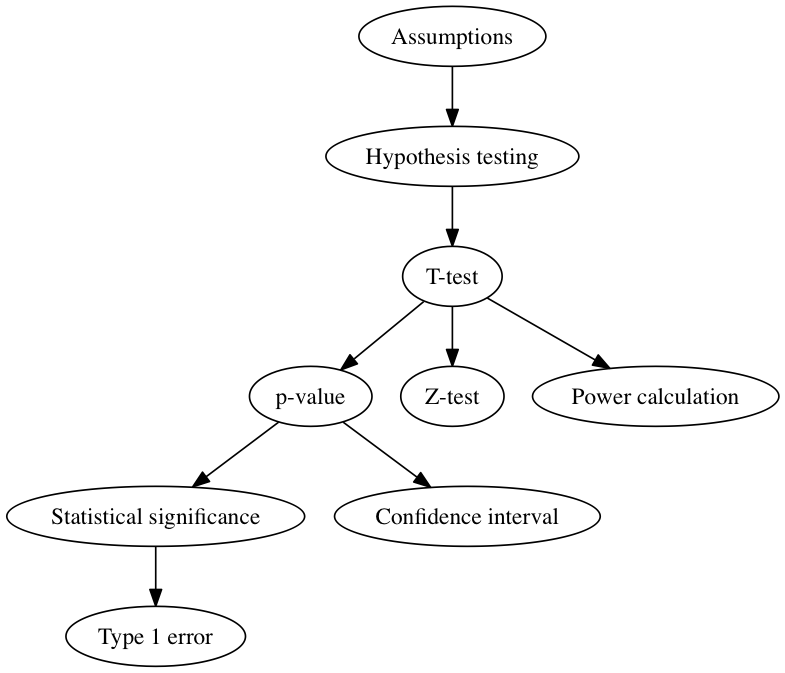

In [3]:
import networkx as nx
from nxpd import draw
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_edges_from([('Hypothesis testing', 'T-test'),
                 ('T-test', 'p-value'),
                  ('T-test', 'Z-test'),
                 ('T-test', 'Power calculation'),
                 ('Assumptions', 'Hypothesis testing'),
                 ('p-value', 'Statistical significance'),
                 ('Statistical significance', 'Type 1 error'),
                 ('p-value', 'Confidence interval')])
draw(G, show='ipynb')

<a id='item2'></a>

#### Warm -up and Quiz

* T-test: a test to compare means of two different groups, based on the assumption that the data is normally distributed. 
    
    * Test statistics: $t= \frac{\bar{x} -\mu  }{\frac{\sigma }{\sqrt{n}}}$

* Z-test: when variances are known.
* p-value: the probability of obtaining a result equal or more extreme than what was observed. *** It estimates the type 1 error ($\alpha$) we are willing to accept. In other words, it estimates how much likely we can observe such extreme data under the null hypothesis.***. 
    * Confidenece level: 1-$\alpha$ 

    * p(observation | hypothesis ) != p(true hypothesis | observation)

Before we dig into this topic, let's take a quiz. How many of these following statement are ***true***?

* Your company wants you to test a new feature on the website that is supposed to make user stay longer. You designed a experiment to test this idea by randomly assiging new or old feature on the website and measuring the time of staying from these two group of users simulatneously. Although you know that the distribution of time spent by users who are assigned to new feature is much different than normal distribution, you go ahead and run a student's t-test on these two group of data.

* Now that you figure it is possible that these two groups of users are normally distrubted. However, users who are assigned to the new feature has much larger variation in the time of browsing that the other group. You used a two-sample t-test on these data.

* You get p = 0.03 from your t-test. You conclude that you now can reject the null hypothesis (the new feature does not have an impact on users' browsing time) as the probability of rejecting null hypothesis is 0.03.


[Click here to check the answer](#answer1)

<a id='item3'></a>

#### Hypothesis testing - example

Now let's look at the distribution of the data. Below is a histogram of simulated web visits (in seconds) from users assigned new/old features. Answer the following questions:

* What is your hypothesis about the new feature? How do you test it?
* How many users you will need to examine in order to prove your hypothesis?

In [1]:
import plotly
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff
from scipy.stats import truncnorm
import numpy as np
#mu = 30
#sigma = 20
# Add histogram data
x1 = truncnorm( a = 1, b = 3).rvs(size=10000)*30
x2 = truncnorm( a = 1, b = 3).rvs(size=10000)*30 + 1
# Group data together
hist_data = [x1, x2]
group_labels = ['Old feature', 'New feature']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=2)
# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

<a id='item4'></a>

#### Power calculation

Below is a function calculating the power of your test on the users' website visit time. In this example, we perform a large number of simulated experiments, each time calculating our test statistic (independent samples t-test, in this case) and accumulating the number of times we reject the null hypothesis. Then, ***the power is simply the proportion of times that we are able to reject the null hypothesis ***(remembering that we control the population means and we know that there is a true difference).

In [37]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from scipy import stats

def sampleSize(x):
    nSims = 10000
    pValues = np.empty(nSims)
    pValues.fill(np.nan)
    for i in range(nSims):
    
        test1 = x1[np.random.randint(10000, size = (1, x))[0]]
        test2 = x2[np.random.randint(10000, size = (1, x))[0]]
        t, p = stats.ttest_ind(test1,test2, equal_var=True)
        pValues[i] = p
        
    nRej = np.sum(pValues < 0.05)
    propRej = nRej / float(nSims)
    
    #################
    print('Power:', propRej)
    print(str(nRej), ' out of 10000 t-tests have p < 0.05.')

##### Toggle the slider bar below to chose a good sample size 

In [39]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(sampleSize, x=widgets.IntSlider(min=1000,max=2500,step=100,value=1400));

Power: 0.7985
7985  out of 10000 t-tests have p < 0.05.


###### How many users should be assigned to each group in order to give us  80% power to detect this 1 second difference from these two groups?

[click here to see another way of calculating power](#answer2)

<a id='item5'></a>

#### Confusion matrix

Hypothesis testing is all about our ability to discriminate between random noise and true signal in data. So how do we measure this ability? In information retrival theory, the metric we use is a 2 by 2 confusion matrix as below.

|                   |       Truth Positive     |      Truth Negative     |
|-------------------|:------------------------:|:-----------------------:|
| **Test Positive** |     True Positive        | False Positive (Type I) |
| **Test Negative** | False Negative (Type II) |     True Negative       |



To understand ***precision, recall***, look at [this picture](https://en.wikipedia.org/wiki/Precision_and_recall#/media/File:Precisionrecall.svg).

* The **Hamming Loss** gives the fraction of labels incorrectly predicted.  It is 1 - Accuracy.
* There is also **F-beta** score which gives a weighted geometric average between the precision and recall (as a function of $\beta$) and the **F-1** score is the special case when $\beta = 1$.
* The **Jaccard Similarity Coefficient** is in general the intersection of the predicted and actual label set divided by the union. This is equivalent to the accuracy score for most classification problems.


Answer the following questions:

* How does confusion matrix relate to significance level?
* How to calculate accuracy, sensitivity and specificity?

<a id='item6'></a>

#### Take home message 

* T-test: a test to compare the average difference of two groups, use in ***hypothesis testing***, based on ***many assumptions***. 

<a id='answer1'></a>

#### Answer
 
* False. T-test is valid only when we assume the data is normally distributed. You need to consider: (1) the reason why the data is not normally distributed (2) transform the data (3) use other tests that do not require the assumption of normal distribution.

* False. You will need to use different types of t-tests depending on whether two groups have the same variances or not.

* False. P-value is not the probability how much likely we will accept the null hypothesis ([Official statement of American Statistical Association](http://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108)). In the above case, p-value only tells us how much incompatible that our user data is in our statistical model. Under the assumption of null hypothesis, p-value can indicate the probability of observing a difference of browsing time as extreme as in our data. 



<a id='answer2'></a>
#### Calculating the sample size 

In [42]:
## here we treat the variance of x1 and x2 as the same
N = 2*(x2.std()**2)*((0.84 + 1.96)**2)/((x2.mean() - x1.mean())**2)
N

1379.2037308074387

## Bayes Theorem and Poserior Inferencing ##

#### [Knowledge graph](#itemA)
#### [Bayes Theorem](#itemB)
#### [Quiz](#itemC)
#### [Bayesian Inferencing](#itemD)
#### [Posterior sampling](#itemE)
#### [Conjugate prior](#itemF)
#### [Take home message](#itemG)

<a id='itemA'></a>

#### Knwoledge graph

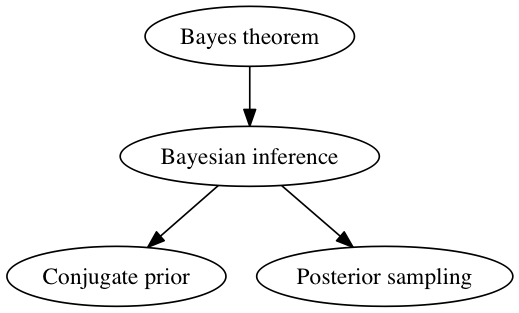

In [206]:
import networkx as nx
from nxpd import draw
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_edges_from([('Bayes theorem', 'Bayesian inference'),
                 ('Bayesian inference', 'Conjugate prior'),
                  ('Bayesian inference', 'Posterior sampling')
                 ])
draw(G, show='ipynb')

<a id='itemB'></a>


#### Bayes theorem
Bayes theorem tells us the posterior probability can be estimated using prior probability and a likelihood function.

\begin{align}
 P( A | B ) = & \frac{ P(B | A) P(A) } {P(B) } \\\\[5pt]
& \propto P(B | A) P(A)\;\; (\propto \text{is proportional to } )
\end{align}



Using this rule we are able to build a tighter ***posterior distribution*** with a ***prior distribution*** for unknown quantity. It is a entirely different way of inference other than ***frequentist statistics*** in that bayesian statistics believe the unknown quantity has to be estimated as many plausible values. We can constantly update our believes and claim how confident about our estimates.

<a id='itemC'></a>


##### Quiz

Here are some facts about interviews:
* 50% of all people who receive a first interview receive a second interview
* 95% of your friends that got a second interview felt they had a good first interview
* 75% of your friends that DID NOT get a second interview felt they had a good first interview

If you feel that you had a good first interview, what is the probability you will receive a second interview?

[Click here to see the answer](https://stats.stackexchange.com/questions/86015/amazon-interview-question-probability-of-2nd-interview)

<a id='itemD'></a>



### Bayesian Inferencing

Consider an example of estimating the number of clicks on a website after implementing a new ad champaign. These following conditions can lead to the decision of using bayesian inference.

* You have a rough idea about the probability of clicking for these kind of ads before the champaign.
* The current data you have is very limited.

Now you want to use your prior knowledge to update your belief. The Bayes version of this idea is:

$Posterior = \dfrac{likelihood * prior}{\sum_{\theta} likelihood * prior}$

To model whether or not users will click the ads, we can use a binomial distribution. Let's say you believe the probability of clicking of such ads is 0.6. Below is a graph showing the ***prior distribution*** of such event:

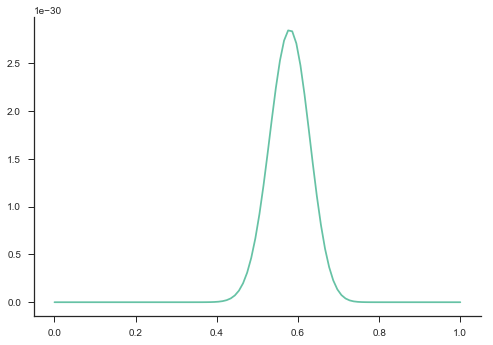

In [46]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='ticks', palette='Set2')
ads_click = np.random.binomial(n=1, p=.6, size=100)
params = np.linspace(0, 1, 100)
p_old = [np.product(st.bernoulli.pmf(ads_click, p)) for p in params]
plt.plot(params, p_old)
sns.despine()

After you sampled 100 users assigned to this new ads, you found that the actual probability was surprisingly higher than you would imagine. Below is a graph showing the ***prior distribution and sampling distribution***.

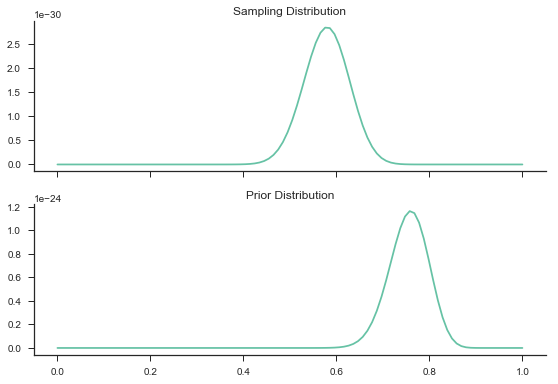

In [47]:
new_ads_click = np.random.binomial(n=1, p=.8, size=100)
p_new = np.array([np.product(st.bernoulli.pmf(new_ads_click, p)) for p in params])
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_old)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_new)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

After observing the current data, you may wish to update the prior distribution for the proportion, taking the current data into consideration. That is, you may wish to calculate the conditional distribution of the probability given the data and the prior. Below is a function calculate the posterior distribution based on ***prior belief and likelihood function***.

In [48]:
def calcPosterior(n_params=100, n_sample=100, true_p=.8, prior_p=.6, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    #return posterior

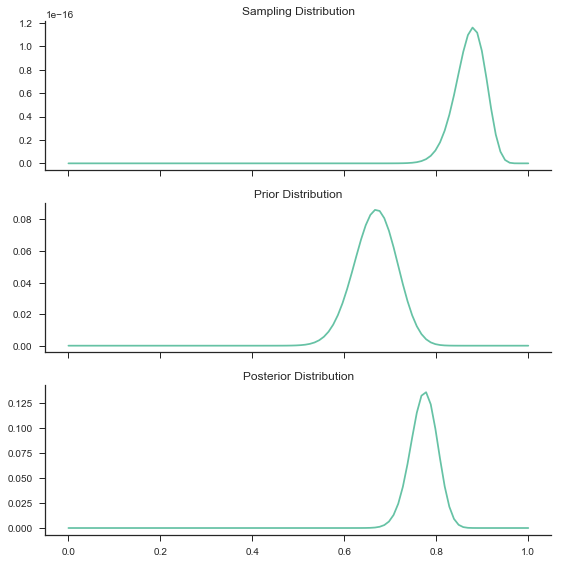

In [49]:
fig2 = calcPosterior()

#### Adjust the sample size: you can see that your prior has less impact on the posterior as the sample size increases.



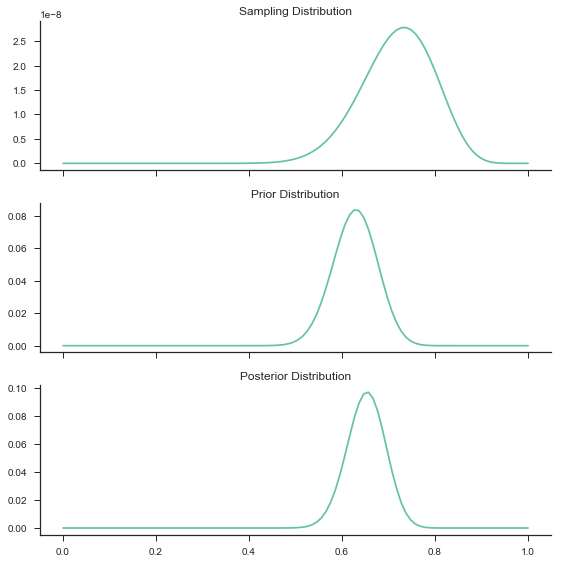

In [50]:
fig = interact(calcPosterior, n_sample=widgets.IntSlider(min=0,max=500,step=10,value=30), n_params = 100,\
         trup_p = .8, prior_p = .6, n_prior = 100)

<a id='itemE'></a>

#### Posterior sampling 

When it is impossible to solve the posterior distribution analytically, we can take random samples and use descriptive statistics (such as mean and standard deviation) to derive the posterior distribution.

In [210]:
from numpy import sum, mean, size, sqrt
from scipy.stats import norm, invgamma

def draw_mus_and_sigmas(data,m0,k0,s_sq0,v0,n_samples=10000):
    # number of samples
    N = size(data)
    # find the mean of the data
    the_mean = mean(data) 
    # sum of squared differences between data and mean
    SSD = sum( (data - the_mean)**2 ) 

    # combining the prior with the data - page 79 of Gelman et al.
    # to make sense of this note that 
    # inv-chi-sq(v,s^2) = inv-gamma(v/2,(v*s^2)/2)
    kN = float(k0 + N)
    mN = (k0/kN)*m0 + (N/kN)*the_mean
    vN = v0 + N
    vN_times_s_sqN = v0*s_sq0 + SSD + (N*k0*(m0-the_mean)**2)/kN

    # 1) draw the variances from an inverse gamma 
    # (params: alpha, beta)
    alpha = vN/2
    beta = vN_times_s_sqN/2
    # thanks to wikipedia, we know that:
    # if X ~ inv-gamma(a,1) then b*X ~ inv-gamma(a,b)
    sig_sq_samples = beta*invgamma.rvs(alpha,size=n_samples)

    # 2) draw means from a normal conditioned on the drawn sigmas
    # (params: mean_norm, var_norm)
    mean_norm = mN
    var_norm = sqrt(sig_sq_samples)/kN
    mu_samples = norm.rvs(mean_norm,scale=var_norm,size=n_samples)

    # 3) return the mu_samples and sig_sq_samples
    return mu_samples, sig_sq_samples

In [212]:
from numpy.random import normal

# step 1: define prior parameters for the normal and inverse gamma
m0 = 4. 
k0 = 1.  
s_sq0 = 1. 
v0 = 1. 

# step 2: get some random data, with slightly different statistics
A_data = normal(loc=4.1, scale=0.9, size=500)
B_data = normal(loc=4.0, scale=1.0, size=500) 

# step 3: get posterior samples
A_mus,A_sig_sqs = draw_mus_and_sigmas(A_data,m0,k0,s_sq0,v0)
B_mus,B_sig_sqs = draw_mus_and_sigmas(B_data,m0,k0,s_sq0,v0)

# step 4: perform numerical integration
# probability that mean of A is greater than mean of B:
print(mean(A_mus > B_mus))
# probability that variance of A is greater than variance of B:
print(mean(A_sig_sqs > B_sig_sqs))

1.0
0.0


<a id='itemF'></a>


#### Posterior Inferencing: using conjugate priors

You can use conjugate prior to solve the posterior distribution if you have an idea of the prior distribution. [Click here to see a list of conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior)

<a id='itemG'></a>

##### Take home message

* Bayes theorm tells us how to update our belief upon observations based on prior knowledge.
* Using prior distribution and likelihood function, we can derive posterior distribution. 